In [1]:
from typing import List, Literal, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def load_data(
    train_path: str = "train.csv", test_path: str = "test.csv"
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Загружает обучающие и тестовые данные.

    Параметры:
    ----------
    train_path : str
        Путь к файлу с обучающими данными
    test_path : str
        Путь к файлу с тестовыми данными

    Возвращает:
    -----------
    train_df : pd.DataFrame
        Обучающие данные
    test_df : pd.DataFrame
        Тестовые данные
    """
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    return train_df, test_df


print("Загрузка данных...")
train_df, test_df = load_data()

Загрузка данных...


## Разведочный анализ данных

In [3]:
def explore_data(df: pd.DataFrame, target_col: str = "RiskScore") -> None:
    """
    Выполняет разведочный анализ данных (EDA).

    Параметры:
    ----------
    df : pd.DataFrame
        Датафрейм для анализа
    target_col : str
        Название столбца с целевой переменной
    """
    print("=" * 80)
    print("РАЗВЕДОЧНЫЙ АНАЛИЗ ДАННЫХ")
    print("=" * 80)

    # Основная информация
    print("\n1. ОСНОВНАЯ ИНФОРМАЦИЯ:")
    print(f"Количество строк: {df.shape[0]}")
    print(f"Количество столбцов: {df.shape[1]}")
    print(f"\nТипы данных:\n{df.dtypes.value_counts()}")

    # Пропущенные значения
    print("\n2. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
    missing = df.isnull().sum()
    missing_percent = 100 * missing / len(df)
    missing_df = pd.DataFrame({"Пропущено": missing, "Процент": missing_percent})
    missing_df = missing_df[missing_df["Пропущено"] > 0].sort_values(
        "Пропущено", ascending=False
    )
    if len(missing_df) > 0:
        print(missing_df)
    else:
        print("Пропущенных значений нет")

    # Целевая переменная
    if target_col in df.columns:
        print(f"\n3. ЦЕЛЕВАЯ ПЕРЕМЕННАЯ ({target_col}):")
        print(df[target_col].describe())

    # Числовые признаки
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in numeric_cols:
        numeric_cols.remove(target_col)

    print(f"\n4. ЧИСЛОВЫЕ ПРИЗНАКИ ({len(numeric_cols)}):")
    print(df[numeric_cols].describe().T)

    # Категориальные признаки
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    print(f"\n5. КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ ({len(categorical_cols)}):")
    for col in categorical_cols:
        print(f"\n{col}: {df[col].nunique()} уникальных значений")
        print(df[col].value_counts().head())


print("\nАнализ обучающих данных...")
explore_data(train_df)


Анализ обучающих данных...
РАЗВЕДОЧНЫЙ АНАЛИЗ ДАННЫХ

1. ОСНОВНАЯ ИНФОРМАЦИЯ:
Количество строк: 11017
Количество столбцов: 35

Типы данных:
float64    29
object      6
Name: count, dtype: int64

2. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
                            Пропущено   Процент
MonthlyDebtPayments              1031  9.358265
LoanAmount                       1031  9.358265
CreditScore                      1031  9.358265
BaseInterestRate                 1031  9.358265
NetWorth                         1031  9.358265
TotalAssets                      1031  9.358265
BankruptcyHistory                1031  9.358265
LoanPurpose                      1031  9.358265
CheckingAccountBalance           1031  9.358265
ApplicationDate                   530  4.810747
Age                               530  4.810747
AnnualIncome                      530  4.810747
HomeOwnershipStatus               530  4.810747
NumberOfCreditInquiries           530  4.810747
NumberOfOpenCreditLines           530  4.810747
CreditCardU

## Матрица корреляций

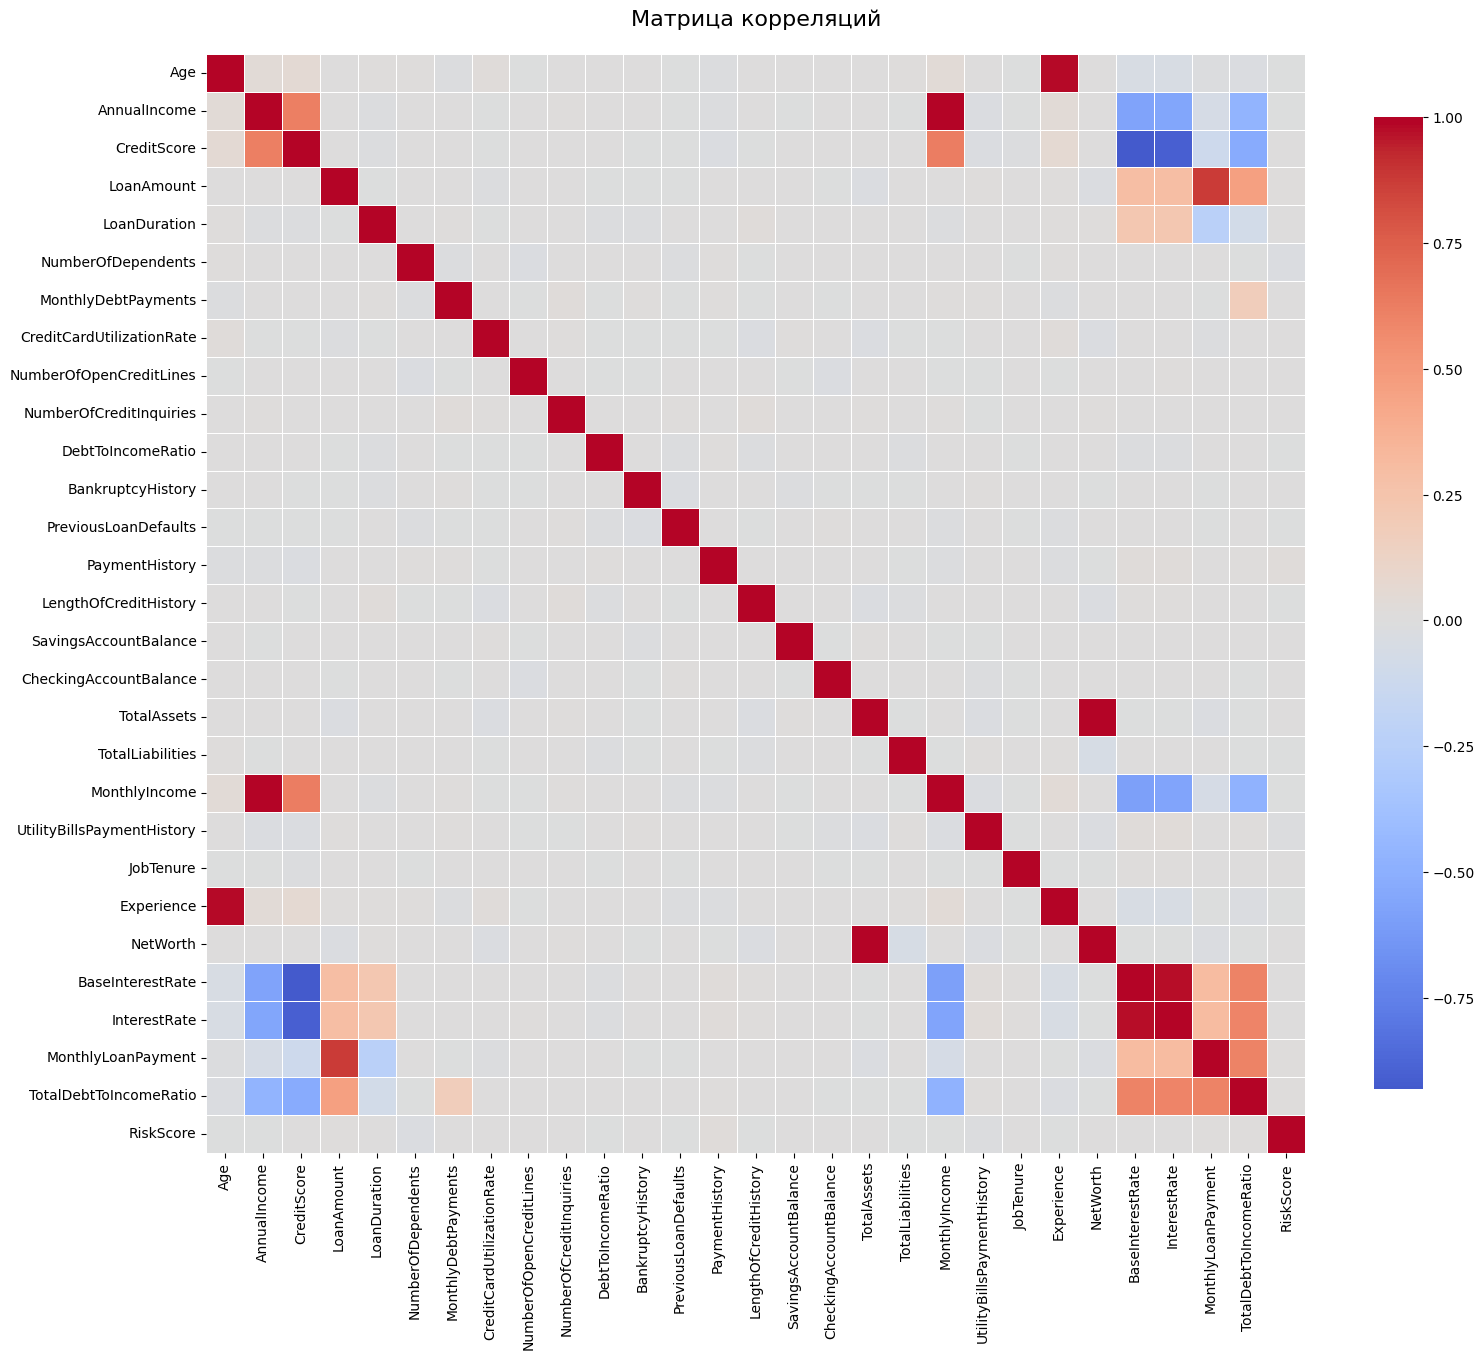


Топ-10 признаков с наибольшей корреляцией с RiskScore:
NumberOfDependents            0.023314
PaymentHistory                0.019144
TotalDebtToIncomeRatio        0.013879
UtilityBillsPaymentHistory    0.013865
MonthlyLoanPayment            0.012366
LoanAmount                    0.011771
NumberOfCreditInquiries       0.011055
LengthOfCreditHistory         0.009448
NetWorth                      0.008804
AnnualIncome                  0.008460
Name: RiskScore, dtype: float64


In [4]:
def plot_correlation_matrix(df: pd.DataFrame, target_col: str = "RiskScore") -> None:
    """
    Строит матрицу корреляций.

    Параметры:
    ----------
    df : pd.DataFrame
        Датафрейм с данными
    target_col : str
        Название столбца с целевой переменной
    save_path : str
        Путь для сохранения графика
    """
    # Выбираем только числовые столбцы
    numeric_df = df.select_dtypes(include=[np.number])

    # Вычисляем корреляцию
    corr_matrix = numeric_df.corr()

    # Создаем фигуру
    plt.figure(figsize=(16, 14))
    sns.heatmap(
        corr_matrix,
        annot=False,
        cmap="coolwarm",
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
    )
    plt.title("Матрица корреляций", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

    # Выводим топ корреляций с целевой переменной
    if target_col in corr_matrix.columns:
        print(f"\nТоп-10 признаков с наибольшей корреляцией с {target_col}:")
        target_corr = (
            corr_matrix[target_col].drop(target_col).abs().sort_values(ascending=False)
        )
        print(target_corr.head(10))


plot_correlation_matrix(train_df)

In [5]:
# Выбор топ признаков для визуализации
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
if "RiskScore" in numeric_cols:
    numeric_cols.remove("RiskScore")

# Вычисляем корреляцию с целевой переменной
corr_with_target = (
    train_df[numeric_cols + ["RiskScore"]].corr()["RiskScore"].drop("RiskScore")
)
top_features = (
    corr_with_target.abs().sort_values(ascending=False).head(9).index.tolist()
)

## Графики распределения признаков

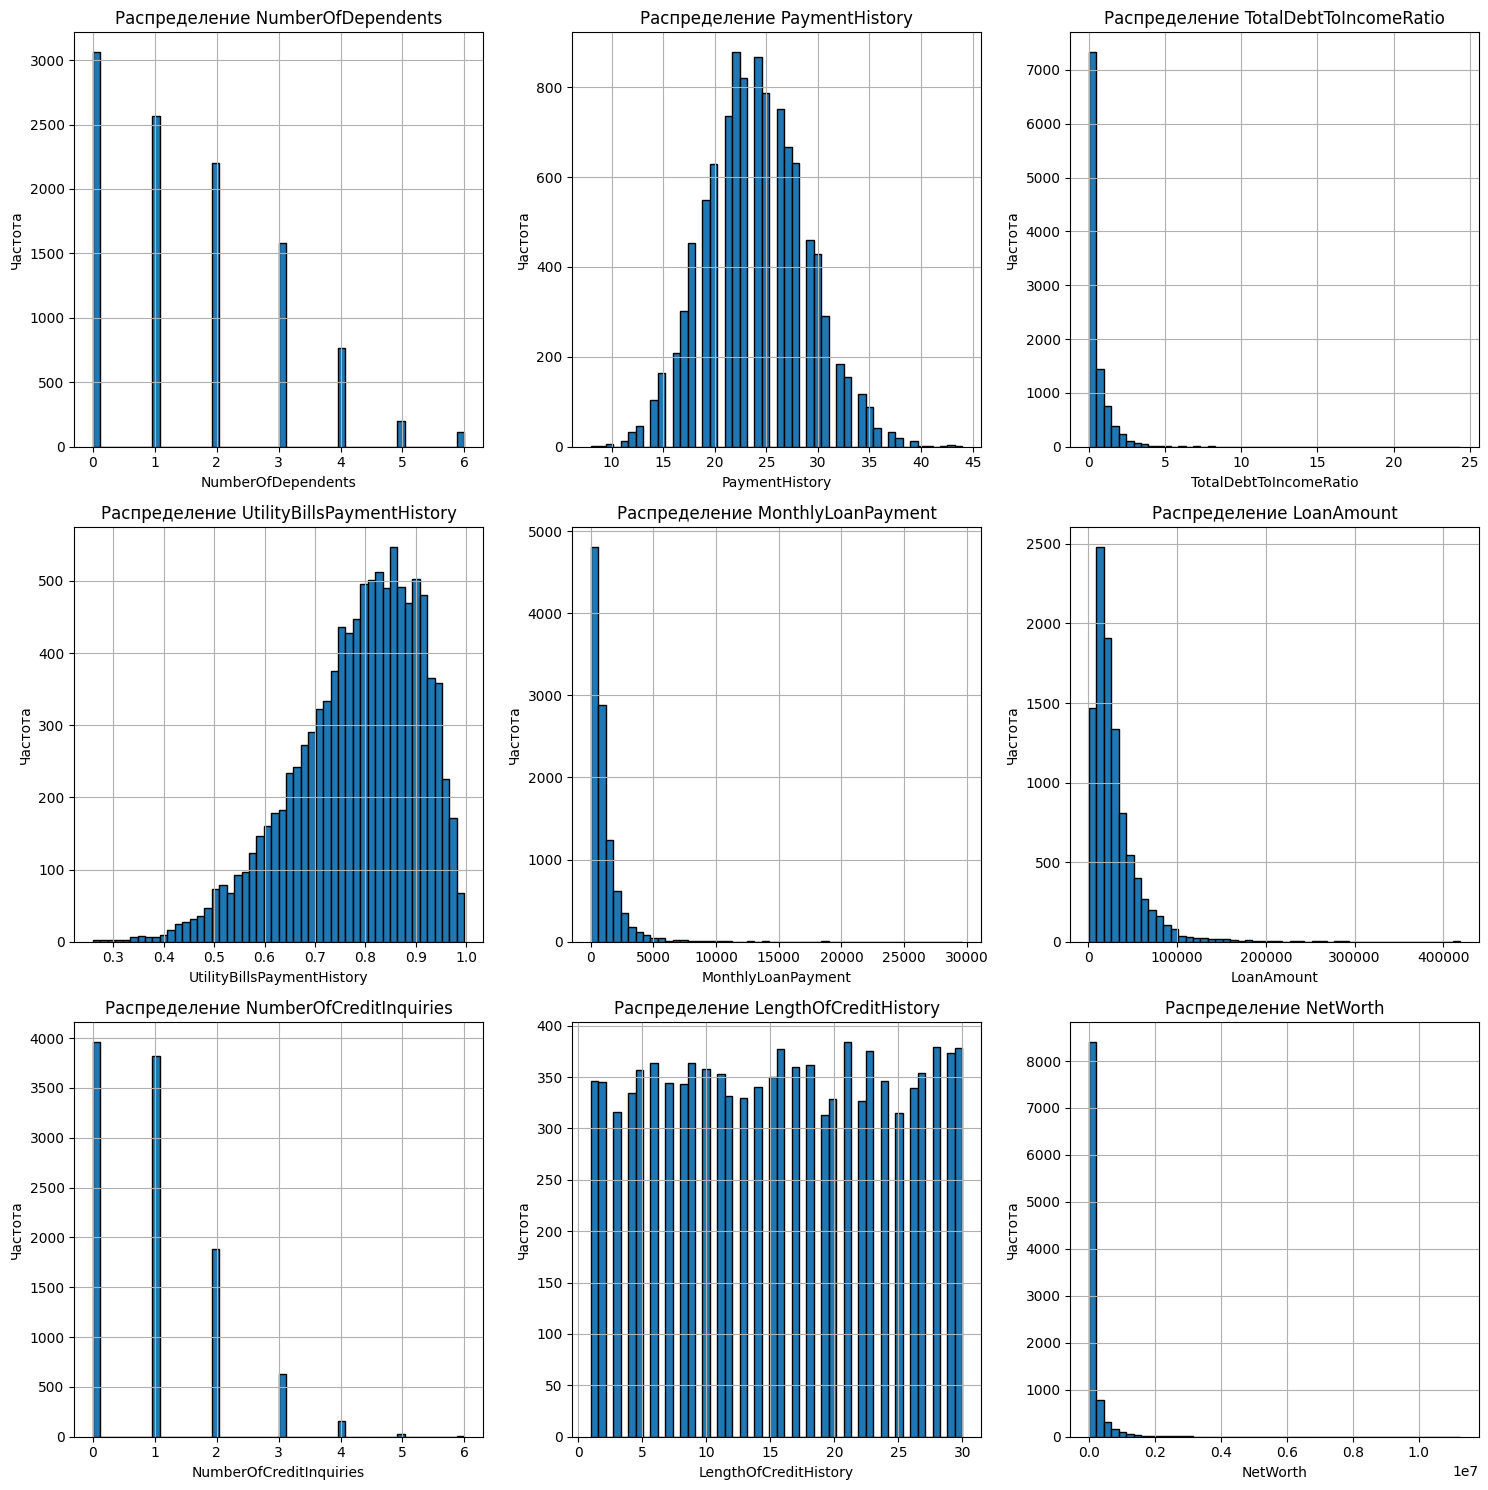

In [6]:
def plot_feature_distributions(
    df: pd.DataFrame,
    features: List[str],
    target_col: str = "RiskScore",
) -> None:
    """
    Строит графики распределений признаков.

    Параметры:
    ----------
    df : pd.DataFrame
        Датафрейм с данными
    features : List[str]
        Список признаков для визуализации
    target_col : str
        Название столбца с целевой переменной
    save_path : str
        Путь для сохранения графика
    """
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten() if n_features > 1 else [axes]

    for idx, feature in enumerate(features):
        if feature in df.columns:
            ax = axes[idx]
            df[feature].hist(bins=50, ax=ax, edgecolor="black")
            ax.set_title(f"Распределение {feature}")
            ax.set_xlabel(feature)
            ax.set_ylabel("Частота")

    # Скрываем пустые подграфики
    for idx in range(n_features, len(axes)):
        axes[idx].axis("off")

    plt.tight_layout()
    plt.show()


# Графики распределений
plot_feature_distributions(train_df, top_features)

## Графики зависимости признаков от целевой переменной

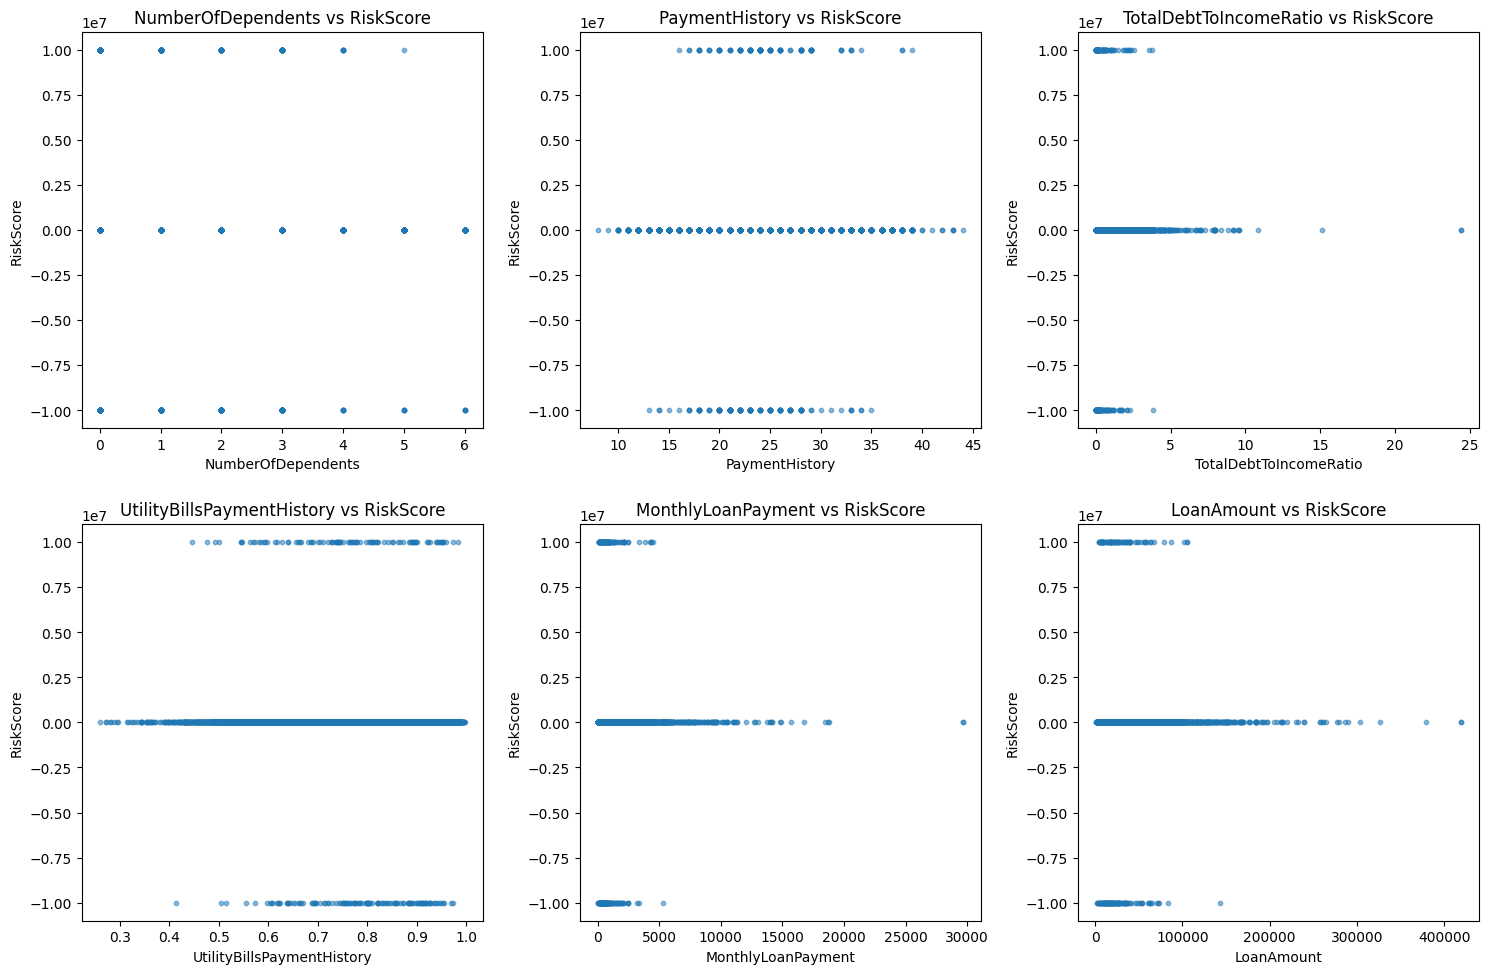

In [7]:
def plot_scatter_with_target(
    df: pd.DataFrame,
    features: List[str],
    target_col: str = "RiskScore",
) -> None:
    """
    Строит графики зависимости признаков от целевой переменной.

    Параметры:
    ----------
    df : pd.DataFrame
        Датафрейм с данными
    features : List[str]
        Список признаков для визуализации
    target_col : str
        Название столбца с целевой переменной
    save_path : str
        Путь для сохранения графика
    """
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten() if n_features > 1 else [axes]

    for idx, feature in enumerate(features):
        if feature in df.columns and target_col in df.columns:
            ax = axes[idx]
            ax.scatter(df[feature], df[target_col], alpha=0.5, s=10)
            ax.set_title(f"{feature} vs {target_col}")
            ax.set_xlabel(feature)
            ax.set_ylabel(target_col)

    # Скрываем пустые подграфики
    for idx in range(n_features, len(axes)):
        axes[idx].axis("off")

    plt.tight_layout()
    plt.show()


# Графики зависимостей
plot_scatter_with_target(train_df, top_features[:6])


## Выводы

Набор данных содержит 11017 наблюдений и 35 признаков, из которых 29 числовых и 6 категориальных. Пропущенные значения присутствуют во всех столбцах и образуют две группы: первая группа из 9 признаков (MonthlyDebtPayments, LoanAmount, CreditScore, BaseInterestRate, NetWorth, TotalAssets, BankruptcyHistory, LoanPurpose, CheckingAccountBalance) имеет около 9.4% пропусков, вторая группа из 26 признаков — около 4.8% пропусков. Это указывает на систематический характер пропусков, вероятно связанный с неполным заполнением анкет определёнными группами заёмщиков.

Целевая переменная RiskScore имеет аномальное распределение со средним значением около -25700 и стандартным отклонением более 1.4 миллиона при минимуме -10 миллионов и максимуме +10 миллионов. При этом медиана составляет всего 44, а межквартильный размах находится в диапазоне 32-65. Это свидетельствует о наличии экстремальных выбросов в данных, где значения -10M и +10M вероятно представляют крайние категории риска (минимальный и максимальный), в то время как основная масса значений сконцентрирована в диапазоне от 0 до 100. По сути, переменная имеет три кластера значений, что видно на диаграммах рассеяния.

Числовые признаки демонстрируют типичные для кредитных данных характеристики. Возраст заёмщиков варьируется от 18 до 80 лет со средним около 40. Годовой доход имеет правостороннюю асимметрию с медианой 89 тысяч и максимумом около 750 тысяч. Кредитный рейтинг находится в стандартном диапазоне 300-850 со средним 678, что соответствует категории "хороший кредит". Суммы займов также распределены асимметрично — медиана около 22 тысяч при максимуме более 400 тысяч.

Матрица корреляций показывает ожидаемые сильные связи между родственными признаками: возраст и опыт работы (почти полная корреляция), годовой и месячный доход, базовая и фактическая процентная ставка, сумма займа и ежемесячный платёж. Целевая переменная RiskScore демонстрирует слабые линейные корреляции с большинством признаков, что может указывать на нелинейную природу зависимости или на то, что экстремальные выбросы искажают корреляционный анализ.

Категориальные признаки распределены неравномерно. Большинство заёмщиков состоят в браке (49%), трудоустроены (86%) и имеют ипотеку или арендуют жильё. Образование преимущественно среднее (40%) или бакалавриат (29%). Цели займов распределены относительно равномерно между покупкой жилья, консолидацией долга и автокредитованием.

Для построения модели рекомендуется провести обработку выбросов в целевой переменной (либо удалить экстремальные значения, либо преобразовать задачу в классификацию на три класса), заполнить пропуски с учётом их систематического характера, а также применить логарифмическое преобразование к признакам с сильной асимметрией (доход, сумма займа, активы, обязательства). Сильно коррелированные признаки (возраст-опыт, базовая-фактическая ставка) следует рассмотреть на предмет удаления одного из пары для снижения мультиколлинеарности.

# Нормализация данных

In [8]:
class StandardScaler:
    """Нормализация данных методом z-score."""

    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X: np.ndarray) -> "StandardScaler":
        """Вычисляет среднее и стандартное отклонение."""
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        # Избегаем деления на ноль
        self.std_[self.std_ == 0] = 1.0
        return self

    def transform(self, X: np.ndarray) -> np.ndarray:
        """Применяет z-score нормализацию."""
        if self.mean_ is None or self.std_ is None:
            raise ValueError("Scaler не обучен. Вызовите fit() сначала.")
        return (X - self.mean_) / self.std_

    def fit_transform(self, X: np.ndarray) -> np.ndarray:
        """Обучает и применяет нормализацию."""
        return self.fit(X).transform(X)


class MinMaxScaler:
    """Нормализация данных методом min-max."""

    def __init__(self):
        self.min_ = None
        self.max_ = None

    def fit(self, X: np.ndarray) -> "MinMaxScaler":
        """Вычисляет минимум и максимум."""
        self.min_ = np.min(X, axis=0)
        self.max_ = np.max(X, axis=0)
        # Избегаем деления на ноль
        self.range_ = self.max_ - self.min_
        self.range_[self.range_ == 0] = 1.0
        return self

    def transform(self, X: np.ndarray) -> np.ndarray:
        """Применяет min-max нормализацию."""
        if self.min_ is None or self.max_ is None:
            raise ValueError("Scaler не обучен. Вызовите fit() сначала.")
        return (X - self.min_) / self.range_

    def fit_transform(self, X: np.ndarray) -> np.ndarray:
        """Обучает и применяет нормализацию."""
        return self.fit(X).transform(X)

# Линейная регрессия

In [9]:
class LinearRegression:
    """
    Линейная регрессия с несколькими методами обучения и регуляризацией.

    Методы обучения:
    - analytical: аналитическое решение через нормальное уравнение
    - gradient_descent: градиентный спуск
    - sgd: стохастический градиентный спуск

    Типы регуляризации:
    - None: без регуляризации
    - l1: Lasso регуляризация
    - l2: Ridge регуляризация
    - l1_l2: ElasticNet регуляризация
    - lp: Lp регуляризация (обобщенная)
    """

    def __init__(
        self,
        method: Literal["analytical", "gradient_descent", "sgd"] = "analytical",
        learning_rate: float = 0.01,
        n_iterations: int = 1000,
        regularization: Literal[None, "l1", "l2", "l1_l2", "lp"] = None,
        alpha: float = 0.01,
        l1_ratio: float = 0.5,
        p: float = 1.5,
        batch_size: int = 32,
        tol: float = 1e-4,
        verbose: bool = False,
        scale_alpha_n: bool = False,
    ):
        """
        Параметры:
        -----------
        method : str
            Метод обучения: 'analytical', 'gradient_descent', 'sgd'
        learning_rate : float
            Скорость обучения для градиентных методов
        n_iterations : int
            Количество итераций для градиентных методов
        regularization : str or None
            Тип регуляризации: None, 'l1', 'l2', 'l1_l2', 'lp'
        alpha : float
            Коэффициент регуляризации
        l1_ratio : float
            Соотношение L1 в ElasticNet (l1_l2), от 0 до 1
        p : float
            Параметр p для Lp регуляризации
        batch_size : int
            Размер батча для SGD
        tol : float
            Порог сходимости
        verbose : bool
            Выводить информацию об обучении
        """
        self.method = method
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.p = p
        self.batch_size = batch_size
        self.tol = tol
        self.verbose = verbose
        self.scale_alpha_n = scale_alpha_n
        self.weights_ = None
        self.bias_ = None
        self.loss_history_ = []

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        """
        Обучает модель.

        Параметры:
        ----------
        X : np.ndarray, shape (n_samples, n_features)
            Обучающие данные
        y : np.ndarray, shape (n_samples,)
            Целевые значения
        """
        # Центрируем данные для стабильного вычисления intercept
        self.X_mean_ = np.mean(X, axis=0)
        self.y_mean_ = np.mean(y)
        X_centered = X - self.X_mean_
        y_centered = y - self.y_mean_

        n_samples, n_features = X.shape

        if self.method == "analytical":
            self._fit_analytical(X_centered, y_centered)
        elif self.method == "gradient_descent":
            self._fit_gradient_descent(X_centered, y_centered)
        elif self.method == "sgd":
            self._fit_sgd(X_centered, y_centered)
        else:
            raise ValueError(f"Неизвестный метод: {self.method}")

        # Восстанавливаем смещение так, как делает sklearn Ridge
        self.bias_ = self.y_mean_ - np.dot(self.X_mean_, self.weights_)

        return self

    def _fit_analytical(self, X: np.ndarray, y: np.ndarray):
        """Аналитическое решение через нормальное уравнение."""
        if self.regularization == "l2":
            # Ridge регрессия: (X^T X + alpha * I)^(-1) X^T y
            n_features = X.shape[1]
            reg_alpha = self.alpha * X.shape[0] if self.scale_alpha_n else self.alpha
            reg_matrix = reg_alpha * np.eye(n_features)
            theta = np.linalg.pinv(X.T @ X + reg_matrix) @ X.T @ y
        elif self.regularization is None:
            # Обычная линейная регрессия через псевдообратную матрицу
            theta = np.linalg.pinv(X) @ y
        else:
            # Для L1, L1_L2 и Lp используем градиентный спуск
            if self.verbose:
                print(
                    f"Аналитическое решение недоступно для {self.regularization}, используем градиентный спуск"
                )
            self.method = "gradient_descent"
            self._fit_gradient_descent(X, y)
            return

        self.weights_ = theta

    def _fit_gradient_descent(self, X: np.ndarray, y: np.ndarray):
        """Градиентный спуск."""
        n_samples, n_features = X.shape

        # Инициализация весов
        self.weights_ = np.zeros(n_features)
        self.bias_ = 0
        self.loss_history_ = []

        for iteration in range(self.n_iterations):
            # Предсказания
            y_pred = X @ self.weights_ + self.bias_

            # Вычисление градиентов
            dw = (2 / n_samples) * (X.T @ (y_pred - y))
            db = (2 / n_samples) * np.sum(y_pred - y)

            # Добавление регуляризации
            if self.regularization == "l1":
                dw += self.alpha * np.sign(self.weights_)
            elif self.regularization == "l2":
                dw += 2 * self.alpha * self.weights_
            elif self.regularization == "l1_l2":
                dw += self.alpha * (
                    self.l1_ratio * np.sign(self.weights_)
                    + 2 * (1 - self.l1_ratio) * self.weights_
                )
            elif self.regularization == "lp":
                # Lp регуляризация: alpha * p * |w|^(p-1) * sign(w)
                dw += (
                    self.alpha
                    * self.p
                    * np.power(np.abs(self.weights_), self.p - 1)
                    * np.sign(self.weights_)
                )

            # Обновление весов
            self.weights_ -= self.learning_rate * dw
            self.bias_ -= self.learning_rate * db

            # Вычисление функции потерь
            loss = self._compute_loss(X, y)
            self.loss_history_.append(loss)

            # Проверка сходимости
            if (
                iteration > 0
                and abs(self.loss_history_[-2] - self.loss_history_[-1]) < self.tol
            ):
                if self.verbose:
                    print(f"Сходимость достигнута на итерации {iteration}")
                break

            if self.verbose and iteration % 100 == 0:
                print(f"Итерация {iteration}, Loss: {loss:.4f}")

    def _fit_sgd(self, X: np.ndarray, y: np.ndarray):
        """Стохастический градиентный спуск."""
        n_samples, n_features = X.shape

        # Инициализация весов
        self.weights_ = np.zeros(n_features)
        self.bias_ = 0
        self.loss_history_ = []

        for iteration in range(self.n_iterations):
            # Перемешиваем данные
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Обработка батчей
            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i : i + self.batch_size]
                y_batch = y_shuffled[i : i + self.batch_size]

                # Предсказания
                y_pred = X_batch @ self.weights_ + self.bias_

                # Вычисление градиентов
                batch_size = X_batch.shape[0]
                dw = (2 / batch_size) * (X_batch.T @ (y_pred - y_batch))
                db = (2 / batch_size) * np.sum(y_pred - y_batch)

                # Добавление регуляризации
                if self.regularization == "l1":
                    dw += self.alpha * np.sign(self.weights_)
                elif self.regularization == "l2":
                    dw += 2 * self.alpha * self.weights_
                elif self.regularization == "l1_l2":
                    dw += self.alpha * (
                        self.l1_ratio * np.sign(self.weights_)
                        + 2 * (1 - self.l1_ratio) * self.weights_
                    )
                elif self.regularization == "lp":
                    dw += (
                        self.alpha
                        * self.p
                        * np.power(np.abs(self.weights_), self.p - 1)
                        * np.sign(self.weights_)
                    )

                # Обновление весов
                self.weights_ -= self.learning_rate * dw
                self.bias_ -= self.learning_rate * db

            # Вычисление функции потерь на всем датасете
            loss = self._compute_loss(X, y)
            self.loss_history_.append(loss)

            # Проверка сходимости
            if (
                iteration > 0
                and abs(self.loss_history_[-2] - self.loss_history_[-1]) < self.tol
            ):
                if self.verbose:
                    print(f"Сходимость достигнута на итерации {iteration}")
                break

            if self.verbose and iteration % 100 == 0:
                print(f"Итерация {iteration}, Loss: {loss:.4f}")

    def _compute_loss(self, X: np.ndarray, y: np.ndarray) -> float:
        """Вычисляет функцию потерь с учетом регуляризации."""
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)

        reg_term = 0
        if self.regularization == "l1":
            reg_term = self.alpha * np.sum(np.abs(self.weights_))
        elif self.regularization == "l2":
            reg_term = self.alpha * np.sum(self.weights_**2)
        elif self.regularization == "l1_l2":
            reg_term = self.alpha * (
                self.l1_ratio * np.sum(np.abs(self.weights_))
                + (1 - self.l1_ratio) * np.sum(self.weights_**2)
            )
        elif self.regularization == "lp":
            reg_term = self.alpha * np.sum(np.abs(self.weights_) ** self.p)

        return mse + reg_term

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Делает предсказания.

        Параметры:
        ----------
        X : np.ndarray, shape (n_samples, n_features)
            Данные для предсказания

        Возвращает:
        -----------
        np.ndarray, shape (n_samples,)
            Предсказанные значения
        """
        if self.weights_ is None:
            raise ValueError("Модель не обучена. Вызовите fit() сначала.")
        return X @ self.weights_ + self.bias_

# Метрика MSE

In [10]:
def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Mean Squared Error (MSE).
    
    MSE = 1/n * sum((y_true - y_pred)^2)
    """
    return np.mean((y_true - y_pred) ** 2)

## Сравнение с sklearn

In [11]:
import sklearn.metrics

np.random.seed(42)
y_true = np.random.randn(100) * 10 + 50
y_pred = y_true + np.random.randn(100) * 3

In [12]:
our_mse = mse(y_true, y_pred)
sklearn_mse = sklearn.metrics.mean_squared_error(y_true, y_pred)
print("\nMSE:")
print(f"  Наша реализация:    {our_mse:.6f}")
print(f"  sklearn:            {sklearn_mse:.6f}")
print(f"  Разница:            {abs(our_mse - sklearn_mse):.10f}")


MSE:
  Наша реализация:    8.107984
  sklearn:            8.107984
  Разница:            0.0000000000


# Метрика MAE

In [13]:
def mae(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Mean Absolute Error (MAE).

    MAE = 1/n * sum(|y_true - y_pred|)
    """
    return np.mean(np.abs(y_true - y_pred))

## Сравнение с sklearn

In [14]:
our_mae = mae(y_true, y_pred)
sklearn_mae = sklearn.metrics.mean_absolute_error(y_true, y_pred)
print("\nMAE:")
print(f"  Наша реализация:    {our_mae:.6f}")
print(f"  sklearn:            {sklearn_mae:.6f}")
print(f"  Разница:            {abs(our_mae - sklearn_mae):.10f}")


MAE:
  Наша реализация:    2.268620
  sklearn:            2.268620
  Разница:            0.0000000000


# Метрика R^2

In [15]:
def r2_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Коэффициент детерминации R^2.
    
    R^2 = 1 - SS_res / SS_tot
    где SS_res = sum((y_true - y_pred)^2)
        SS_tot = sum((y_true - mean(y_true))^2)
    """
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

## Сравнение с sklearn

In [16]:
our_r2 = r2_score(y_true, y_pred)
sklearn_r2 = sklearn.metrics.r2_score(y_true, y_pred)
print("\nR²:")
print(f"  Наша реализация:    {our_r2:.6f}")
print(f"  sklearn:            {sklearn_r2:.6f}")
print(f"  Разница:            {abs(our_r2 - sklearn_r2):.10f}")


R²:
  Наша реализация:    0.900701
  sklearn:            0.900701
  Разница:            0.0000000000


# Метрика MAPE

In [17]:
def mape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Mean Absolute Percentage Error (MAPE).
    
    MAPE = 1/n * sum(|y_true - y_pred| / |y_true|) * 100
    """
    # Избегаем деления на ноль
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

## Сравнение с sklearn

In [18]:
our_mape = mape(y_true, y_pred)
sklearn_mape = sklearn.metrics.mean_absolute_percentage_error(y_true, y_pred) * 100
print("\nMAPE:")
print(f"  Наша реализация:    {our_mape:.6f}%")
print(f"  sklearn:            {sklearn_mape:.6f}%")
print(f"  Разница:            {abs(our_mape - sklearn_mape):.10f}%")


MAPE:
  Наша реализация:    4.884576%
  sklearn:            4.884576%
  Разница:            0.0000000000%


# Кросс-валидация

In [19]:
def k_fold_cross_validation(
    X,
    y: np.ndarray,
    model_class,
    model_params: dict,
    k: int = 5,
    shuffle: bool = True,
    random_state: int = None,
    preprocess_fn=None,
) -> Tuple[np.ndarray, float, float]:
    """
    K-fold кросс-валидация.

    Параметры:
    ----------
    X : np.ndarray или pd.DataFrame
        Признаки
    y : np.ndarray
        Целевая переменная
    model_class : class
        Класс модели (например, LinearRegression)
    model_params : dict
        Параметры для инициализации модели
    k : int
        Количество фолдов
    shuffle : bool
        Перемешивать ли данные перед разбиением
    random_state : int
        Seed для воспроизводимости
    preprocess_fn : callable, optional
        Функция препроцессинга: (X_train, X_test, y_train) -> (X_train_proc, X_test_proc)
        Если None, препроцессинг не применяется

    Возвращает:
    -----------
    scores : np.ndarray
        MSE для каждого фолда
    mean_score : float
        Среднее значение MSE
    std_score : float
        Стандартное отклонение MSE
    """
    n_samples = len(X)
    indices = np.arange(n_samples)

    if shuffle:
        if random_state is not None:
            np.random.seed(random_state)
        np.random.shuffle(indices)

    fold_size = n_samples // k
    scores = []

    # Проверяем, является ли X DataFrame
    is_dataframe = hasattr(X, "iloc")

    for i in range(k):
        # Индексы тестовой выборки
        test_start = i * fold_size
        test_end = (i + 1) * fold_size if i < k - 1 else n_samples
        test_indices = indices[test_start:test_end]

        # Индексы обучающей выборки
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])

        # Разбиение данных
        if is_dataframe:
            X_train = X.iloc[train_indices].reset_index(drop=True)
            X_test = X.iloc[test_indices].reset_index(drop=True)
        else:
            X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Препроцессинг внутри фолда (если задан)
        if preprocess_fn is not None:
            X_train, X_test = preprocess_fn(X_train, X_test, y_train)

        # Обучение и оценка модели
        model = model_class(**model_params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        score = mse(y_test, y_pred)
        scores.append(score)

    scores = np.array(scores)
    return scores, scores.mean(), scores.std()


def leave_one_out_cross_validation(
    X: np.ndarray, y: np.ndarray, model_class, model_params: dict
) -> Tuple[np.ndarray, float, float]:
    """
    Leave-One-Out кросс-валидация.

    Параметры:
    ----------
    X : np.ndarray
        Признаки
    y : np.ndarray
        Целевая переменная
    model_class : class
        Класс модели (например, LinearRegression)
    model_params : dict
        Параметры для инициализации модели

    Возвращает:
    -----------
    scores : np.ndarray
        MSE для каждой итерации
    mean_score : float
        Среднее значение MSE
    std_score : float
        Стандартное отклонение MSE
    """
    n_samples = X.shape[0]
    scores = []

    for i in range(n_samples):
        # Разбиение данных
        X_test = X[i : i + 1]
        y_test = y[i : i + 1]
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i, axis=0)

        # Обучение и оценка модели
        model = model_class(**model_params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        score = mse(y_test, y_pred)
        scores.append(score)

    scores = np.array(scores)
    return scores, scores.mean(), scores.std()

# Обучение модели

In [20]:
def preprocess_data(
    df: pd.DataFrame,
    is_train: bool = True,
    target_col: str = "RiskScore",
    return_df: bool = False,
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Предобработка данных: фильтрация, создание признаков, заполнение пропусков.

    Параметры:
    ----------
    df : pd.DataFrame
        Датафрейм с данными
    is_train : bool
        Флаг, является ли это обучающей выборкой
    target_col : str
        Название столбца с целевой переменной

    Возвращает:
    -----------
    X : np.ndarray
        Матрица признаков
    y : np.ndarray
        Вектор целевой переменной (только для обучающей выборки)
    """
    df = df.copy()

    # Фильтрация выбросов для обучающей выборки
    if is_train and target_col in df.columns:
        df = df[df[target_col] > 0]
        df = df[df[target_col] < 100]

    # Заполнение пропусков медианой для числовых столбцов
    numerical_columns = df.select_dtypes(include=["number"])
    df[numerical_columns.columns] = numerical_columns.fillna(numerical_columns.median())

    # Удаление ненужных столбцов (ID только в test.csv, его тоже удаляем для консистентности)
    columns_to_drop = [
        "ID",
        "ApplicationDate",
        "AnnualIncome",
        "Age",
        "MonthlyLoanPayment",
    ]
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)

    # Создание новых признаков (без epsilon)
    if "MonthlyIncome" in df.columns and "LoanAmount" in df.columns:
        df["MonthlyIncomeToLoanAmountRatio"] = df["MonthlyIncome"] / df["LoanAmount"]

    if "LoanAmount" in df.columns and "TotalAssets" in df.columns:
        df["LoanToValueRatio"] = df["LoanAmount"] / df["TotalAssets"]

    if "NetWorth" in df.columns and "LoanAmount" in df.columns:
        df["NetWorthToLoanAmountRatio"] = df["NetWorth"] / df["LoanAmount"]

    # Замена inf на NaN (для случаев деления на 0) - они будут заполнены при импутации
    df = df.replace([np.inf, -np.inf], np.nan)

    # Разделение на признаки и целевую переменную
    if is_train and target_col in df.columns:
        y = df[target_col].values
        X = df.drop(columns=[target_col])
    else:
        y = None
        X = df

    if return_df:
        return X, y

    # One-Hot Encoding для категориальных признаков
    categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
    if categorical_cols:
        X = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=float)

    # Преобразование в numpy array
    X = X.values.astype(np.float64)

    if is_train:
        return X, y
    else:
        return X, None


X_train, y_train = preprocess_data(train_df, is_train=True, return_df=True)
X_test, _ = preprocess_data(test_df, is_train=False, return_df=True)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (10272, 33)
Размер тестовой выборки: (5000, 33)


In [21]:
class RobustScaler:
    """Нормализация данных методом robust scaling (медиана и IQR)."""

    def __init__(self):
        self.median_ = None
        self.iqr_ = None

    def fit(self, X: np.ndarray) -> "RobustScaler":
        """Вычисляет медиану и межквартильный размах."""
        self.median_ = np.median(X, axis=0)
        q1 = np.percentile(X, 25, axis=0)
        q3 = np.percentile(X, 75, axis=0)
        self.iqr_ = q3 - q1
        # Избегаем деления на ноль
        self.iqr_[self.iqr_ == 0] = 1.0
        return self

    def transform(self, X: np.ndarray) -> np.ndarray:
        """Применяет robust scaling."""
        if self.median_ is None or self.iqr_ is None:
            raise ValueError("Scaler не обучен. Вызовите fit() сначала.")
        return (X - self.median_) / self.iqr_

    def fit_transform(self, X: np.ndarray) -> np.ndarray:
        """Обучает и применяет нормализацию."""
        return self.fit(X).transform(X)

In [22]:
def signed_log1p_transform(X: np.ndarray) -> np.ndarray:
    """
    Применяет signed log1p трансформацию к данным.
    
    signed_log1p(x) = sign(x) * log(1 + |x|)
    
    Параметры:
    ----------
    X : np.ndarray
        Матрица признаков
        
    Возвращает:
    -----------
    X_transformed : np.ndarray
        Трансформированная матрица
    """
    return np.sign(X) * np.log1p(np.abs(X))

In [23]:
from sklearn.feature_selection import f_regression as sk_f_regression


class FeatureSelector:
    """
    Отбор признаков на основе F-статистики (f_regression).
    """

    def __init__(self, percentile: int = 25):
        """
        Parameters
        ----------
        percentile : int
            Процент признаков для отбора (0-100)
        """
        self.percentile = percentile
        self.scores_ = None
        self.selected_features_ = None

    def _f_regression(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Вычисляет F-статистику для каждого признака (устойчиво к константам)."""
        scores, _ = sk_f_regression(X, y)
        scores = np.nan_to_num(scores, nan=0.0, posinf=0.0, neginf=0.0)
        return scores

    def fit(self, X: np.ndarray, y: np.ndarray) -> "FeatureSelector":
        """Вычисляет статистику и выбирает признаки."""
        self.scores_ = self._f_regression(X, y)
        n_features = X.shape[1]
        n_selected = max(1, int(n_features * self.percentile / 100))
        self.selected_features_ = np.argsort(self.scores_)[-n_selected:]
        return self

    def transform(self, X: np.ndarray) -> np.ndarray:
        """Отбирает признаки по ранее вычисленному набору."""
        if self.selected_features_ is None:
            raise ValueError("FeatureSelector не обучен. Вызовите fit() сначала.")
        return X[:, self.selected_features_]

    def fit_transform(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Комбинированный fit + transform."""
        return self.fit(X, y).transform(X)

In [24]:
from sklearn.preprocessing import PolynomialFeatures


def _prepare_matrices(
    X_train_df: pd.DataFrame,
    X_test_df: pd.DataFrame,
    y_train: np.ndarray,
    use_poly: bool,
    poly_degree: int,
    feature_percentile: int | None,
) -> Tuple[np.ndarray, np.ndarray]:
    """Готовит матрицы признаков в стиле sklearn pipeline."""
    # Разделяем типы
    num_cols = X_train_df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = X_train_df.select_dtypes(exclude=[np.number]).columns.tolist()

    # Импутация
    X_train_num = X_train_df[num_cols].copy()
    X_test_num = X_test_df[num_cols].copy()
    num_medians = X_train_num.median()
    X_train_num = X_train_num.fillna(num_medians)
    X_test_num = X_test_num.fillna(num_medians)

    X_train_cat = X_train_df[cat_cols].copy()
    X_test_cat = X_test_df[cat_cols].copy()
    if cat_cols:
        cat_modes = X_train_cat.mode().iloc[0]
        X_train_cat = X_train_cat.fillna(cat_modes)
        X_test_cat = X_test_cat.fillna(cat_modes)

    # signed log + robust scaler только для числовых
    scaler = RobustScaler()
    X_train_num = signed_log1p_transform(X_train_num.values)
    X_test_num = signed_log1p_transform(X_test_num.values)
    X_train_num = scaler.fit_transform(X_train_num)
    X_test_num = scaler.transform(X_test_num)

    # Полиномиальные признаки только на числовых
    if use_poly:
        poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
        X_train_num = poly.fit_transform(X_train_num)
        X_test_num = poly.transform(X_test_num)

    # One-Hot для категориальных (без drop_first, как в sklearn)
    if cat_cols:
        X_train_cat = pd.get_dummies(X_train_cat, drop_first=False, dtype=float)
        X_test_cat = pd.get_dummies(X_test_cat, drop_first=False, dtype=float)
        X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0.0)
        X_train_cat_arr = X_train_cat.values
        X_test_cat_arr = X_test_cat.values
    else:
        X_train_cat_arr = np.empty((len(X_train_df), 0))
        X_test_cat_arr = np.empty((len(X_test_df), 0))

    X_train_matrix = np.hstack([X_train_num, X_train_cat_arr]).astype(np.float64)
    X_test_matrix = np.hstack([X_test_num, X_test_cat_arr]).astype(np.float64)

    # Отбор признаков
    if feature_percentile is not None:
        selector = FeatureSelector(percentile=feature_percentile)
        X_train_matrix = selector.fit_transform(X_train_matrix, y_train)
        X_test_matrix = selector.transform(X_test_matrix)

    return X_train_matrix, X_test_matrix


def _make_preprocess_fn(use_poly: bool, poly_degree: int, feature_percentile: int):
    """Создаёт функцию препроцессинга для k_fold_cross_validation."""

    def preprocess_fn(X_train, X_test, y_train):
        return _prepare_matrices(
            X_train, X_test, y_train, use_poly, poly_degree, feature_percentile
        )

    return preprocess_fn

In [25]:
def train_and_evaluate_model(
    X_train_df: pd.DataFrame,
    y_train: np.ndarray,
    X_test_df: pd.DataFrame,
    method: str = "analytical",
    regularization: str = None,
    alpha: float = 0.01,
    use_poly: bool = True,
    poly_degree: int = 2,
    feature_percentile: int = None,
    k_folds: int = 5,
    scale_alpha_n: bool = False,
) -> tuple:
    """
    Обучает и оценивает модель линейной регрессии.

    Параметры:
    ----------
    X_train : np.ndarray
        Обучающие признаки
    y_train : np.ndarray
        Обучающие целевые значения
    X_test : np.ndarray
        Тестовые признаки
    method : str
        Метод обучения: 'analytical', 'gradient_descent', 'sgd'
    regularization : str
        Тип регуляризации: None, 'l1', 'l2', 'l1_l2', 'lp'
    alpha : float
        Коэффициент регуляризации
    use_poly : bool
        Использовать полиномиальные признаки
    poly_degree : int
        Степень полиномиальных признаков
    feature_percentile : int
        Процент признаков для отбора (None - без отбора)
    k_folds : int
        Количество фолдов для кросс-валидации

    Возвращает:
    -----------
    model : LinearRegression
        Обученная модель
    predictions : np.ndarray
        Предсказания на тестовой выборке
    cv_mean : float
        Среднее значение MSE на кросс-валидации
    cv_std : float
        Стандартное отклонение MSE на кросс-валидации
    """
    print("=" * 80)
    print("ОБУЧЕНИЕ МОДЕЛИ")
    print("=" * 80)

    print("\n1. Подготовка признаков (импутация, лог, масштабирование, поли, OHE)...")
    X_train_selected, X_test_selected = _prepare_matrices(
        X_train_df, X_test_df, y_train, use_poly, poly_degree, feature_percentile
    )
    print(f"   Итоговое число признаков: {X_train_selected.shape[1]}")

    step_num = 2
    print(f"\n{step_num}. Обучение модели (метод: {method}, регуляризация: {regularization})...")

    model_params = {
        "method": method,
        "regularization": regularization,
        "alpha": alpha,
        "learning_rate": 0.01,
        "n_iterations": 1000,
        "tol": 1e-6,
        "verbose": False,
        "scale_alpha_n": scale_alpha_n,
    }

    model = LinearRegression(**model_params)
    model.fit(X_train_selected, y_train)

    step_num += 1
    print(f"\n{step_num}. Кросс-валидация ({k_folds}-fold, препроцессинг внутри фолдов)...")
    preprocess_fn = _make_preprocess_fn(use_poly, poly_degree, feature_percentile)
    cv_scores, cv_mean, cv_std = k_fold_cross_validation(
        X_train_df,
        y_train,
        LinearRegression,
        model_params,
        k=k_folds,
        shuffle=True,
        random_state=1488,
        preprocess_fn=preprocess_fn,
    )

    print(f"\n   MSE по фолдам: {cv_scores}")
    print(f"   Среднее MSE: {cv_mean:.4f} ± {cv_std:.4f}")

    step_num += 1
    print(f"\n{step_num}. Оценка на обучающей выборке...")
    y_train_pred = model.predict(X_train_selected)
    train_mse = mse(y_train, y_train_pred)
    train_mae = mae(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mape = mape(y_train, y_train_pred)

    print(f"   MSE:  {train_mse:.4f}")
    print(f"   MAE:  {train_mae:.4f}")
    print(f"   R²:   {train_r2:.4f}")
    print(f"   MAPE: {train_mape:.4f}%")

    step_num += 1
    print(f"\n{step_num}. Предсказания на тестовой выборке...")
    predictions = model.predict(X_test_selected)

    print(f"   Предсказаний сделано: {len(predictions)}")
    print(f"   Min: {predictions.min():.2f}, Max: {predictions.max():.2f}, Mean: {predictions.mean():.2f}")

    return model, predictions, cv_mean, cv_std

In [26]:
print("\n" + "=" * 80)
print("ОБУЧЕНИЕ С РАЗЛИЧНЫМИ КОНФИГУРАЦИЯМИ")
print("=" * 80)

configs = [
    {'method': 'analytical', 'regularization': 'l2', 'alpha': 12.0, 'use_poly': True, 'poly_degree': 3, 'feature_percentile': 25},
    {'method': 'analytical', 'regularization': 'l2', 'alpha': 15.0, 'use_poly': True, 'poly_degree': 3, 'feature_percentile': 25},
    {'method': 'analytical', 'regularization': 'l2', 'alpha': 18.0, 'use_poly': True, 'poly_degree': 3, 'feature_percentile': 25},
    {'method': 'analytical', 'regularization': 'l2', 'alpha': 15.0, 'use_poly': True, 'poly_degree': 3, 'feature_percentile': 22},
    {'method': 'analytical', 'regularization': 'l2', 'alpha': 15.0, 'use_poly': True, 'poly_degree': 3, 'feature_percentile': 27},
    {'method': 'analytical', 'regularization': 'l2', 'alpha': 15.0, 'use_poly': True, 'poly_degree': 3, 'feature_percentile': 30},
    {'method': 'analytical', 'regularization': 'l2', 'alpha': 12.0, 'use_poly': True, 'poly_degree': 3, 'feature_percentile': 27},
    {'method': 'analytical', 'regularization': 'l2', 'alpha': 18.0, 'use_poly': True, 'poly_degree': 3, 'feature_percentile': 27},
]

best_cv_score = float('inf')
best_predictions = None
best_config = None

for idx, config in enumerate(configs, 1):
    print(f"\n>>> Конфигурация {idx}/{len(configs)}: {config}")
    
    model, predictions, cv_mean, cv_std = train_and_evaluate_model(
        X_train, y_train, X_test, **config
    )
    
    if cv_mean < best_cv_score:
        best_cv_score = cv_mean
        best_predictions = predictions
        best_config = config
        print(f"\n✓ Новая лучшая конфигурация! CV MSE: {cv_mean:.4f}")

print("\n" + "=" * 80)
print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ")
print("=" * 80)
print(f"\nЛучшая конфигурация: {best_config}")
print(f"Лучшее CV MSE: {best_cv_score:.4f}")

print("\nСохранение предсказаний...")
test_df_result = pd.read_csv("test.csv")
df_preds = pd.DataFrame({
    'ID': test_df_result['ID'],
    'RiskScore': best_predictions
})
df_preds.to_csv("submission.csv", index=False)
print("Предсказания сохранены в submission.csv")

print("\n" + "=" * 80)
print("ОБУЧЕНИЕ ЗАВЕРШЕНО!")
print("=" * 80)


ОБУЧЕНИЕ С РАЗЛИЧНЫМИ КОНФИГУРАЦИЯМИ

>>> Конфигурация 1/8: {'method': 'analytical', 'regularization': 'l2', 'alpha': 12.0, 'use_poly': True, 'poly_degree': 3, 'feature_percentile': 25}
ОБУЧЕНИЕ МОДЕЛИ

1. Подготовка признаков (импутация, лог, масштабирование, поли, OHE)...
   Итоговое число признаков: 1128

2. Обучение модели (метод: analytical, регуляризация: l2)...

3. Кросс-валидация (5-fold, препроцессинг внутри фолдов)...

   MSE по фолдам: [28.07344684 26.42724875 25.16795703 25.74013342 30.0807768 ]
   Среднее MSE: 27.0979 ± 1.7814

4. Оценка на обучающей выборке...
   MSE:  22.4490
   MAE:  3.5148
   R²:   0.9245
   MAPE: 8.1209%

5. Предсказания на тестовой выборке...
   Предсказаний сделано: 5000
   Min: 19.60, Max: 99.82, Mean: 48.16

✓ Новая лучшая конфигурация! CV MSE: 27.0979

>>> Конфигурация 2/8: {'method': 'analytical', 'regularization': 'l2', 'alpha': 15.0, 'use_poly': True, 'poly_degree': 3, 'feature_percentile': 25}
ОБУЧЕНИЕ МОДЕЛИ

1. Подготовка признаков (импута